<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day25_Smart_Home_Energy_Monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project involves building a system that can detect unusual energy usage patterns in a home. The core concept is anomaly detection - identifying data points that deviate significantly from the norm.**

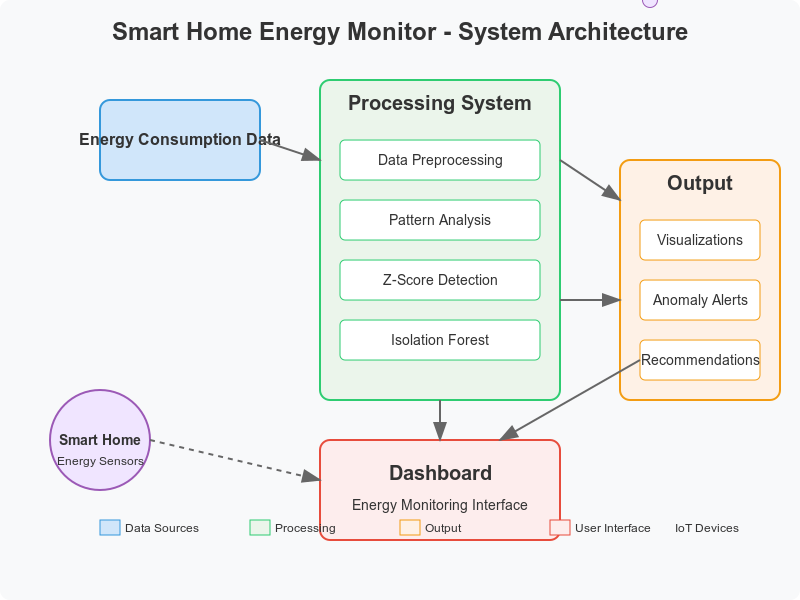

**Setup in Google Colab**

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

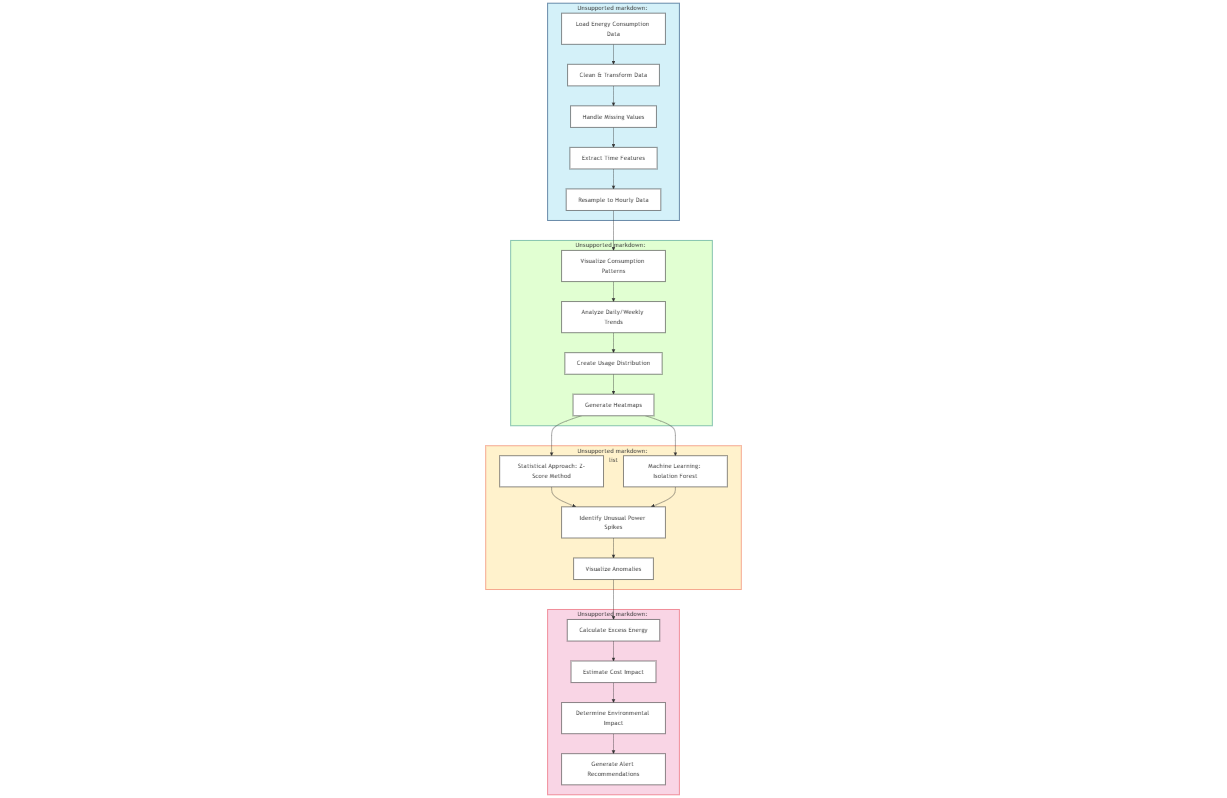

**Data Loading and Preparation**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')  # To keep our output clean

**using the UCI dataset, here's how to load it**

In [7]:
# Download the UCI household power consumption dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
!wget $url
!unzip household_power_consumption.zip

--2025-05-10 00:51:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip.1’

household_power_con     [  <=>               ]  19.68M  69.5MB/s    in 0.3s    

2025-05-10 00:51:03 (69.5 MB/s) - ‘household_power_consumption.zip.1’ saved [20640916]

Archive:  household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: household_power_consumption.txt  


**# Load the data - but only take a smaller sample first**

In [16]:
print("Loading a sample of the dataset...")
# We'll only read the first 10,000 rows to test our code
df_sample = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 parse_dates={'timestamp': ['Date', 'Time']},
                 dayfirst=True,  # The dataset uses DD/MM/YYYY format
                 na_values=['?'],  # Missing values are marked as ?
                 nrows=10000)  # Only read 10,000 rows for testing

# Display sample information
print("Sample data loaded. Shape:", df_sample.shape)
print("\nFirst 5 rows:")
print(df_sample.head())

Loading a sample of the dataset...
Sample data loaded. Shape: (10000, 8)

First 5 rows:
            timestamp  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


**Data Preparation**

In [17]:
# Handle missing values
print("Handling missing values...")
df_sample.fillna(method='ffill', inplace=True)

# Add time features
print("Adding time features...")
df_sample['hour'] = df_sample['timestamp'].dt.hour
df_sample['dayofweek'] = df_sample['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday

# Check processed data
print("\nProcessed data (first 5 rows):")
print(df_sample.head())

# Basic statistics
print("\nStatistics for Global_active_power:")
print(df_sample['Global_active_power'].describe())

Handling missing values...
Adding time features...

Processed data (first 5 rows):
            timestamp  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  hour  \
0              18.4             0.0             1.0            17.0    17   
1              23.0             0.0             1.0            16.0    17   
2              23.0             0.0             2.0            17.0    17   
3              23.0             0.0             1.0            17.0    17   
4              15.8             0.0             1.0            

**Simple Visualization**

Creating basic visualizations...


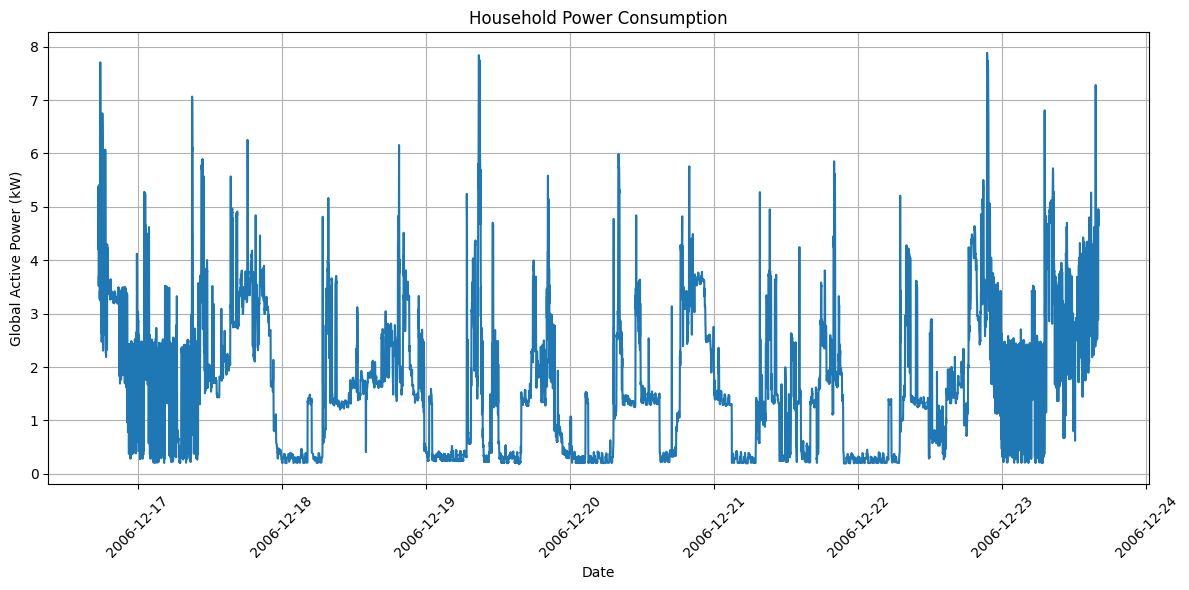

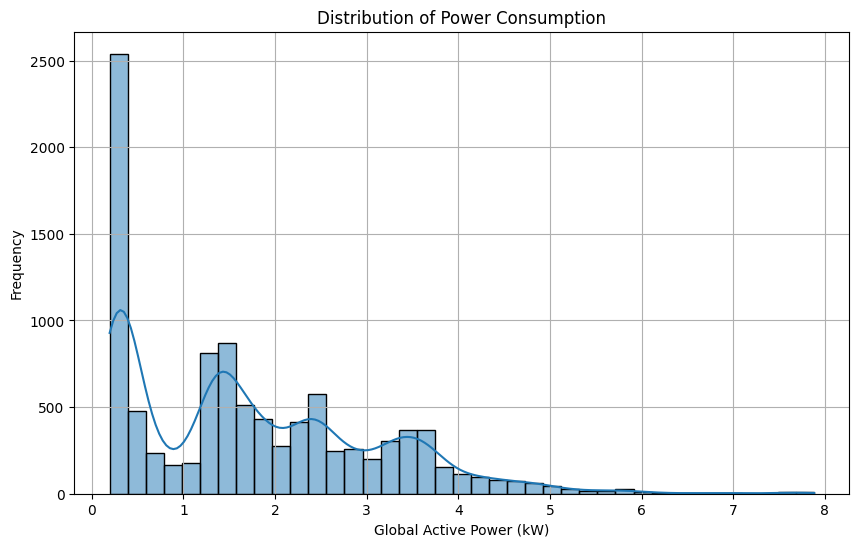

In [18]:
# Visualize energy consumption
print("Creating basic visualizations...")
plt.figure(figsize=(12, 6))
plt.plot(df_sample['timestamp'], df_sample['Global_active_power'])
plt.title('Household Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of power consumption
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['Global_active_power'], kde=True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Simple Anomaly Detection**

Implementing Z-score anomaly detection...
Detected 132 anomalies using Z-score method.


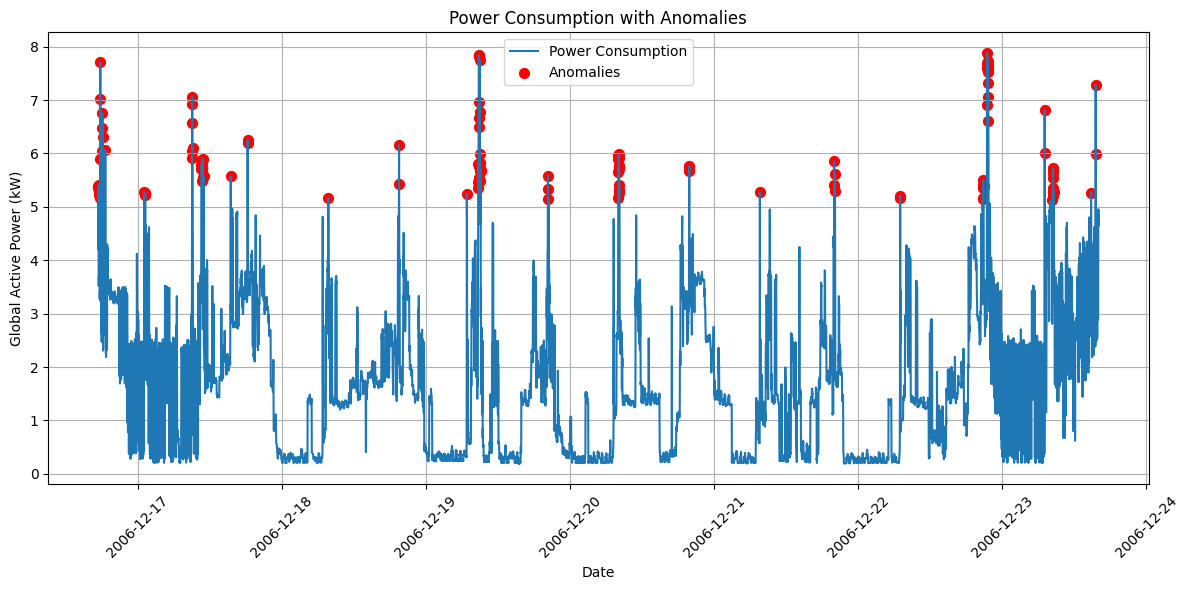

In [19]:
# Implement Z-score anomaly detection
print("Implementing Z-score anomaly detection...")

# Get energy data as numpy array
energy_data = df_sample['Global_active_power'].values

# Calculate z-scores
mean = np.mean(energy_data)
std = np.std(energy_data)
z_scores = [(y - mean) / std for y in energy_data]

# Find anomalies using z-scores
threshold = 2.5
anomaly_indices = [i for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

print(f"Detected {len(anomaly_indices)} anomalies using Z-score method.")

# Visualize with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_sample['timestamp'], energy_data, label='Power Consumption')

# Highlight anomalies
if anomaly_indices:
    anomaly_timestamps = df_sample['timestamp'].iloc[anomaly_indices]
    anomaly_values = energy_data[anomaly_indices]
    plt.scatter(anomaly_timestamps, anomaly_values, color='red', s=50, label='Anomalies')

plt.title('Power Consumption with Anomalies')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Isolation Forest Anomaly Detection**

Implementing Isolation Forest anomaly detection...
Detected 493 anomalies using Isolation Forest.


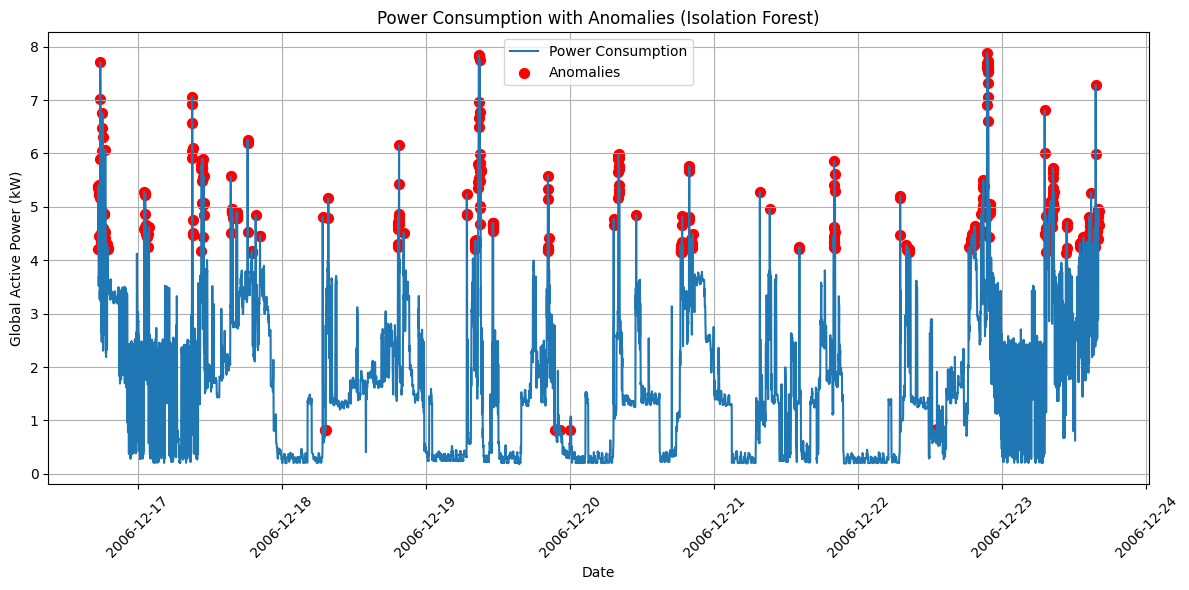

In [20]:
# Implement Isolation Forest
print("Implementing Isolation Forest anomaly detection...")

# Reshape data for scikit-learn
X = energy_data.reshape(-1, 1)

# Initialize and fit the model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies
predictions = model.predict(X)
isolation_forest_indices = [i for i in range(len(predictions)) if predictions[i] == -1]

print(f"Detected {len(isolation_forest_indices)} anomalies using Isolation Forest.")

# Visualize Isolation Forest results
plt.figure(figsize=(12, 6))
plt.plot(df_sample['timestamp'], energy_data, label='Power Consumption')

# Highlight anomalies
if isolation_forest_indices:
    anomaly_timestamps = df_sample['timestamp'].iloc[isolation_forest_indices]
    anomaly_values = energy_data[isolation_forest_indices]
    plt.scatter(anomaly_timestamps, anomaly_values, color='red', s=50, label='Anomalies')

plt.title('Power Consumption with Anomalies (Isolation Forest)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Basic Analysis**

In [21]:
# Analyze anomalies
print("Analyzing anomalies...")

# Calculate impact
normal_mean = np.mean([energy_data[i] for i in range(len(energy_data)) if i not in anomaly_indices])
anomaly_mean = np.mean([energy_data[i] for i in anomaly_indices]) if anomaly_indices else 0

print(f"Average power during normal operation: {normal_mean:.2f} kW")
print(f"Average power during anomalies: {anomaly_mean:.2f} kW")

if anomaly_indices:
    # Calculate excess energy
    excess_per_hour = anomaly_mean - normal_mean
    total_excess = excess_per_hour * len(anomaly_indices)

    # Cost impact (assuming $0.15 per kWh)
    cost_impact = total_excess * 0.15

    print(f"Estimated excess energy: {total_excess:.2f} kWh")
    print(f"Estimated cost impact: ${cost_impact:.2f}")

Analyzing anomalies...
Average power during normal operation: 1.69 kW
Average power during anomalies: 6.02 kW
Estimated excess energy: 571.92 kWh
Estimated cost impact: $85.79
